In [223]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# 1. Introduction

This dataset captures the email communication network of a large European research institution over 18 months, from October 2003 to May 2005. Each node represents an email address and each directed edge indicates at least one message sent from one address to another. The data includes over 3 million emails between nearly 288,000 addresses, with complete records available for 1,258 institutional accounts. Due to the size of the dataset, this analysis focuses on a 50-node sample.

In [224]:
G = nx.read_edgelist("email-Eu-core.txt")

In [ ]:
subset =  list(G.nodes())[:50]
subG = G.subgraph(subset)


# 2. Email Communication Subgraph

[]

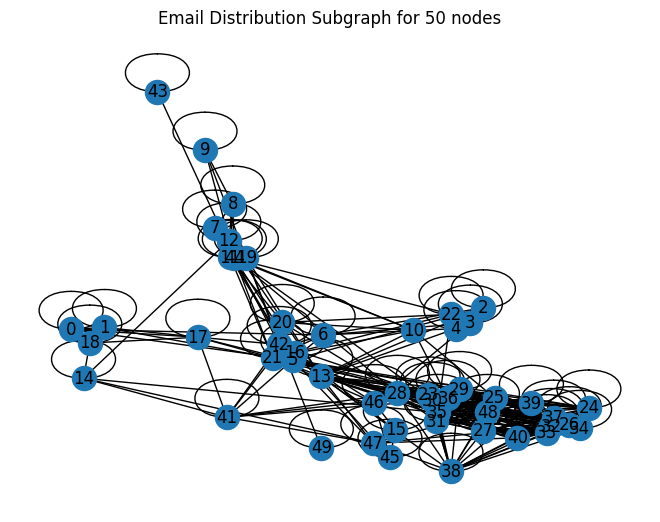

In [226]:
pos = nx.spring_layout(G, seed=5)
nx.draw(subG, pos, with_labels=True,node_size=300,font_size=12)
plt.title("Email Distribution Subgraph for 50 nodes")
plt.plot()


This subgraph represents a sample of 50 email addresses and their communication patterns. The visualization shows a dense cluster in the lower-right portion, where many nodes are tightly interconnected, suggesting a group of accounts that exchange messages frequently. Several nodes, such as 43, 9, and 14, appear on the periphery with fewer links, indicating more limited participation in the network. Meanwhile, the central cluster contains overlapping connections that likely drive most of the information flow. Some nodes also display a small loop connected back to themselves, which represents addresses that sent emails to their own account.

# 3. Graph Metrics and Analysis

In [232]:

is_connected = nx.is_connected(subG)
avg_length = nx.average_shortest_path_length(subG)
diameter = nx.diameter(subG)
has_eulerian_path = nx.has_eulerian_path(subG)
has_circuit = nx.is_eulerian(subG)
radius = nx.radius(subG)
degrees = dict(subG.degree())


degree_values = list(degrees.values())
degree_count = Counter(degree_values)





In [230]:
print("Graph Metrics Summary")
print("-" * 50)
print(f"Connected:             {is_connected}")
print(f"Average Path Length:   {avg_length:.2f}")
print(f"Diameter:              {diameter}")
print(f"Radius:                {radius}")
print(f"Eulerian Path Exists:  {has_eulerian_path}")
print(f"Eulerian Circuit:      {has_circuit}")
print(f"Degree Distribution:   {degrees}")
print("-" * 50)


Graph Metrics Summary
--------------------------------------------------
Connected:             True
Average Path Length:   2.16
Diameter:              4
Radius:                3
Eulerian Path Exists:  False
Eulerian Circuit:      False
Degree Distribution:   {'2': 7, '32': 16, '44': 15, '12': 9, '37': 20, '18': 5, '26': 17, '27': 21, '28': 24, '16': 4, '8': 7, '25': 15, '40': 21, '49': 3, '13': 23, '15': 6, '42': 10, '23': 23, '17': 9, '29': 22, '45': 5, '47': 10, '10': 7, '9': 5, '24': 20, '30': 22, '3': 6, '31': 17, '34': 20, '35': 23, '11': 12, '19': 10, '6': 8, '43': 3, '14': 7, '7': 8, '46': 8, '48': 9, '33': 17, '38': 20, '39': 17, '36': 17, '22': 6, '4': 6, '0': 7, '5': 15, '21': 18, '41': 11, '20': 8, '1': 5}
--------------------------------------------------


The network is connected, so every address can reach every other. The average path length is 2.16, which means a typical pair of addresses is a little over two steps apart. The diameter is 4, so even the most distant pair is only four steps away, and the radius is 3, which tells us the most central nodes can reach everyone else within three steps. Finally, no Eulerian path and no Eulerian circuit are possible, so there is no way to traverse every edge exactly once, which reflects the uneven distribution of node degrees across the graph.

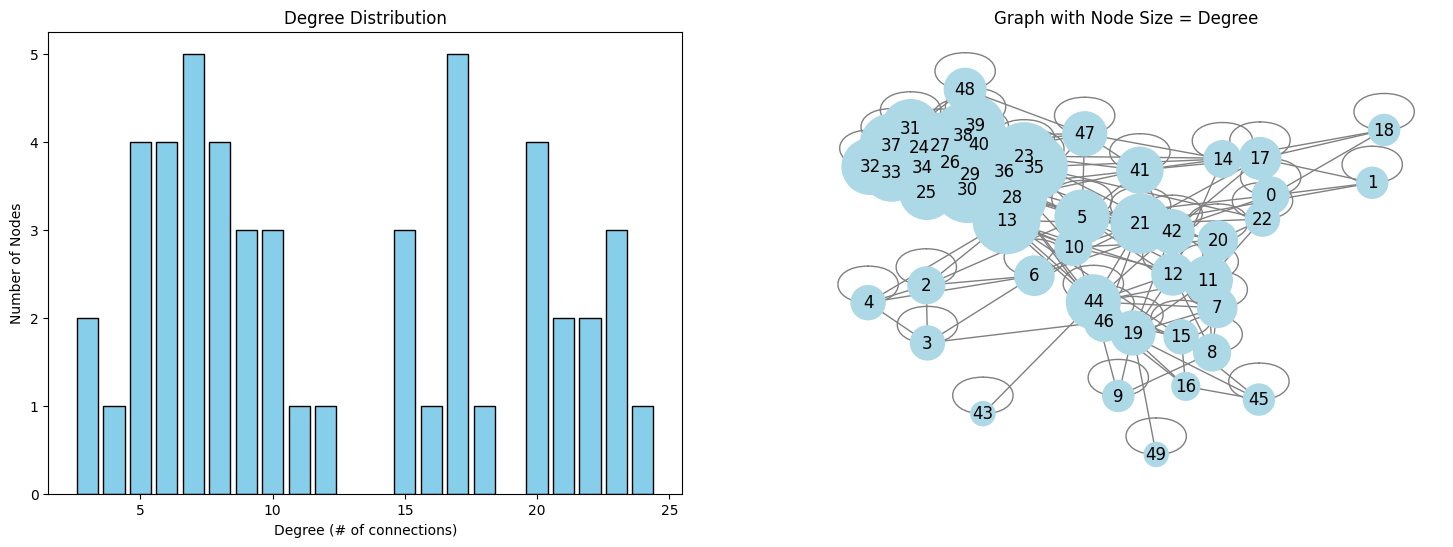

In [221]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)

plt.bar(degree_count.keys(), degree_count.values(), color="skyblue", edgecolor="black")
plt.xlabel("Degree (# of connections)")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")


pos = nx.spring_layout(subG, seed=2)
node_sizes = [deg*100 for deg in degree_values] 

plt.subplot(1, 2, 2)

nx.draw(subG, pos, with_labels=True, node_size=node_sizes, node_color="lightblue", edge_color="gray")
plt.title("Graph with Node Size = Degree")
plt.show()

The degree distribution shows that most email addresses in this sample are connected to a moderate number of others, typically between 5 and 10, while a smaller number of addresses reach much higher degrees of 20 or more. This pattern suggests that everyday communication is fairly limited for most accounts, but a few addresses stand out as highly connected hubs. The network plot makes this clear: larger nodes such as 23, 30, and 35 are central players that connect to many others, creating a dense cluster in the middle of the graph. In contrast, smaller nodes like 3, 4, and 43 appear on the edges with only a few connections, reflecting more limited participation.

# 4. Conclusion

This email network of 50 nodes show the traits of a small-world system, where most addresses are only a few steps apart and the farthest pairs are four steps away. A few highly connected hubs, such as nodes 23, 30, and 35, form a scale-free structure that keeps the network tightly connected. This makes the system resilient to random loss of peripheral nodes but vulnerable if a hub is removed. The absence of an Eulerian path or circuit reflects the uneven spread of connections and the unequal role nodes play in sustaining communication.
